In [1789]:
# Importing the required libraries
# hide warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [1790]:
# Reading the dataset
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1791]:
# Checking the shape
data.shape

(1460, 81)

In [1792]:
# Checking the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1793]:
# Checking the description
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1794]:
# Checking the null values percentage
100 * (data.isnull().sum()/len(data.index))

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [1795]:
# Imputing the null values with 'none' for the categorical columns
categorical_columns_with_null = ["BsmtQual", "BsmtCond", "BsmtFinType1", "BsmtExposure", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "FireplaceQu", "MasVnrType", "Fence", "Alley", "MiscFeature", "PoolQC", "Electrical"]
for i in categorical_columns_with_null:
    data[i].fillna("none", inplace = True)

In [1796]:
# Checking again for null values
null = data.isnull().sum()
null1 = null[null>0]
null1

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [1797]:
# Checking description of above columns
rem_null_columns = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]
for i in rem_null_columns:
    print(data[i].describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


In [1798]:
# Imputing null values with mean for "MasVnrArea"
data.MasVnrArea.fillna(data.MasVnrArea.mean(), inplace=True)

# Imputing null values with median for "GarageYrBlt"
data.GarageYrBlt.fillna(data.GarageYrBlt.median(), inplace=True)

In [1799]:
# Imputing null value of LotFrontage with median of similar 'Neighborhood' values
data['LotFrontage'] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [1800]:
# Checking again for null values
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [1801]:
# Checking the data shape again
data.shape

(1460, 81)

In [1802]:
# Dropping ID column as it is not useful
data = data.drop(["Id"], axis=1)
data.shape

(1460, 80)

  Exploratory Data Analysis

Text(0.5, 1.0, 'SalePrice vs Neighborhood')

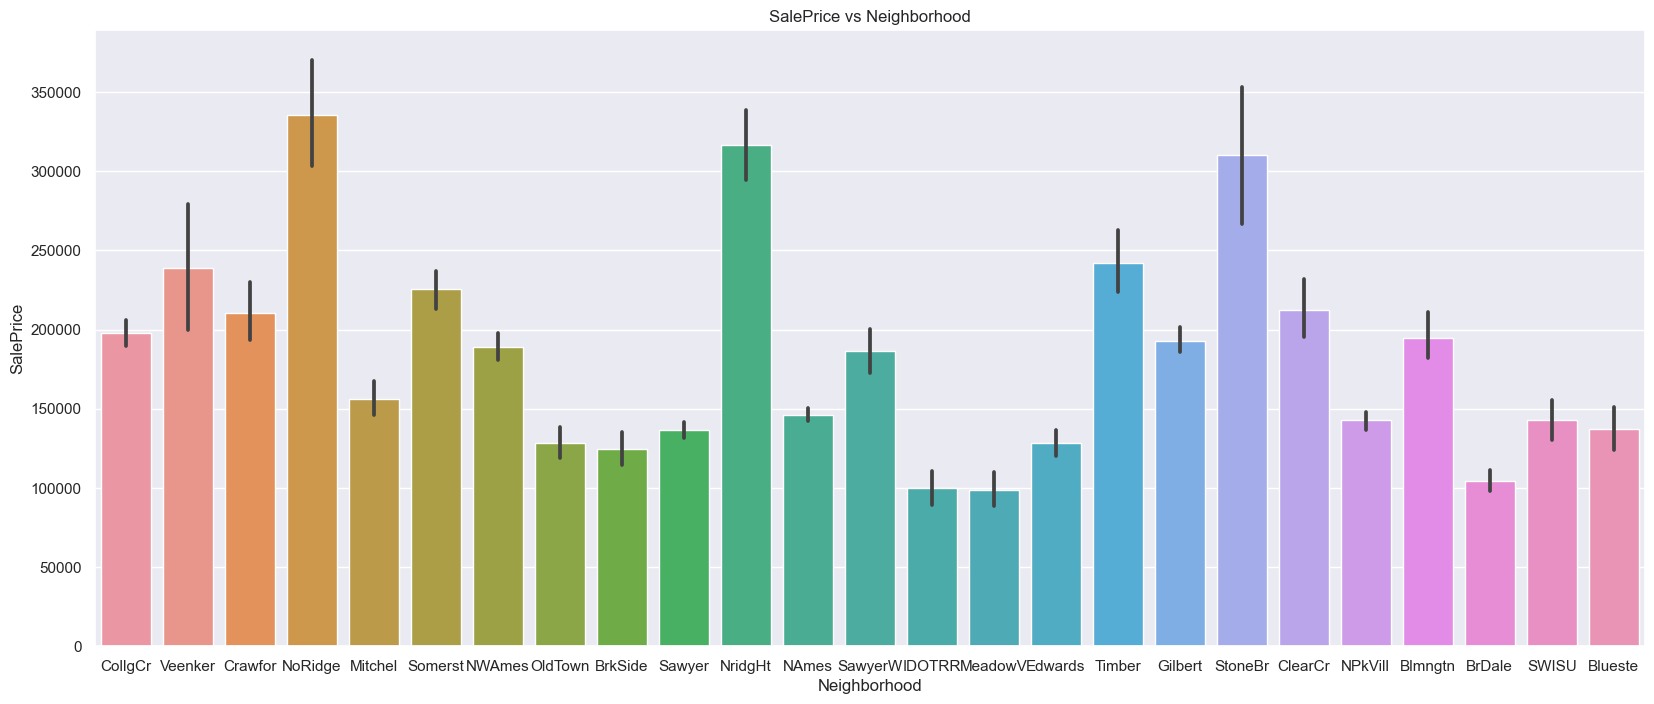

In [1803]:
# Plotting bar plot for SalePrice vs Neighborhood
plt.figure(figsize=(20, 8))
sns.barplot(x=data.Neighborhood, y=data.SalePrice)
plt.title("SalePrice vs Neighborhood")

Some of the neighborhoods have high priced properties

Text(0.5, 1.0, 'SalePrice vs OverallQual')

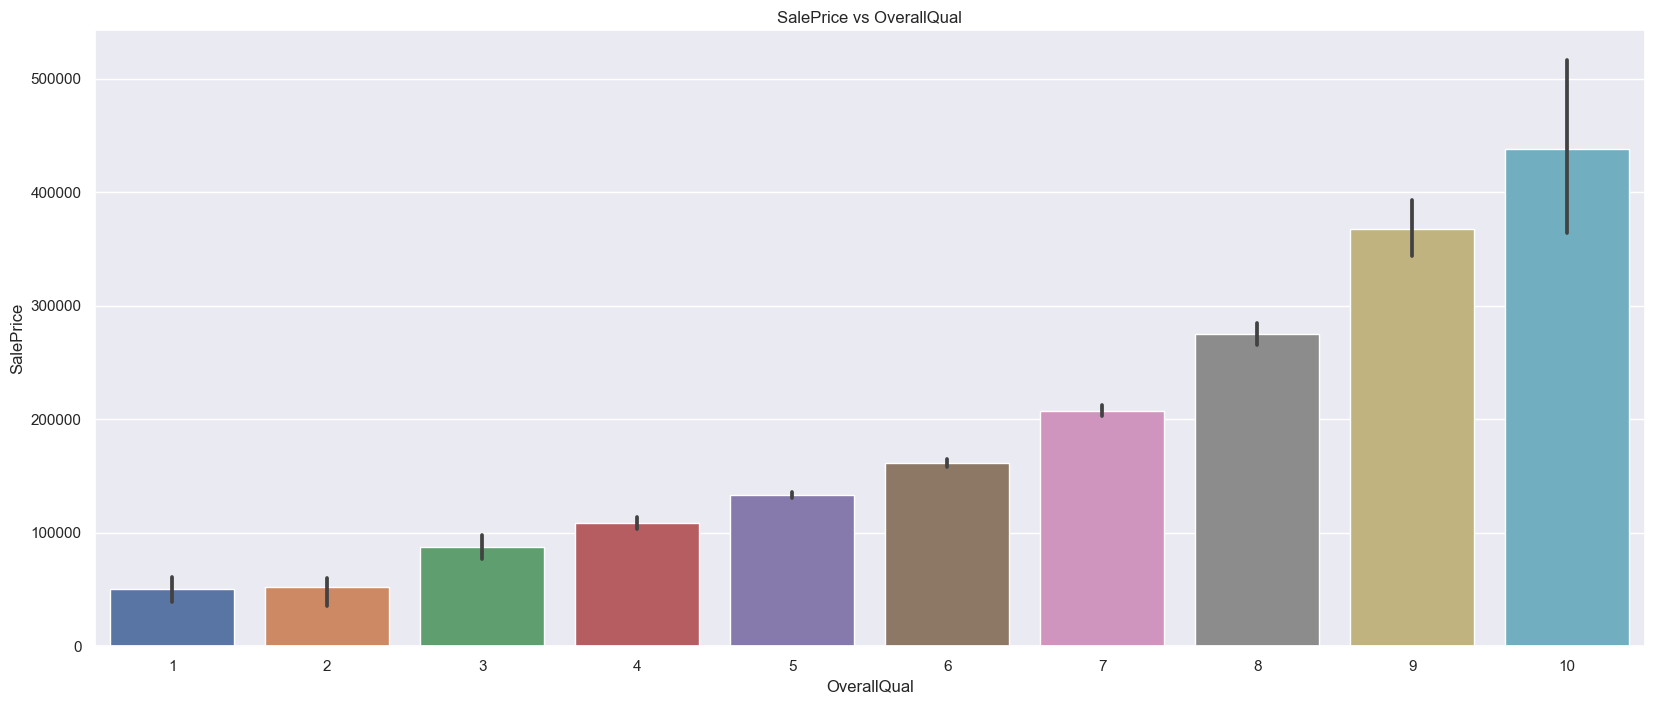

In [1804]:
# Plotting bar plot for SalePrice vs OverallQual
plt.figure(figsize=(20, 8))
sns.barplot(x=data.OverallQual, y=data.SalePrice)
plt.title("SalePrice vs OverallQual")

Properties whose quality is high their price is high

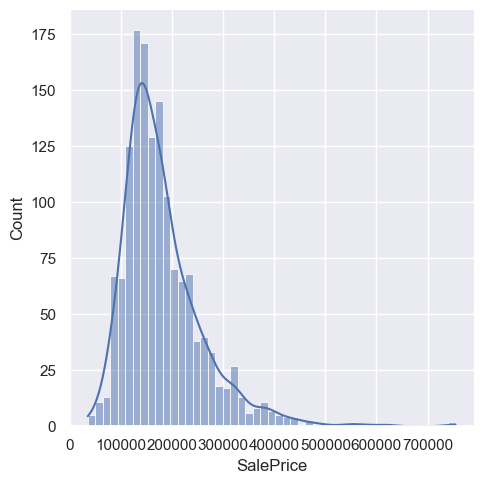

In [1805]:
# Analyzing the target variable 'SalePrice'
sns.displot(data.SalePrice, kde = True)

The target variable is skewed towards right

In [1806]:
# Log transforming SalePrice
data.SalePrice = np.log(data.SalePrice)

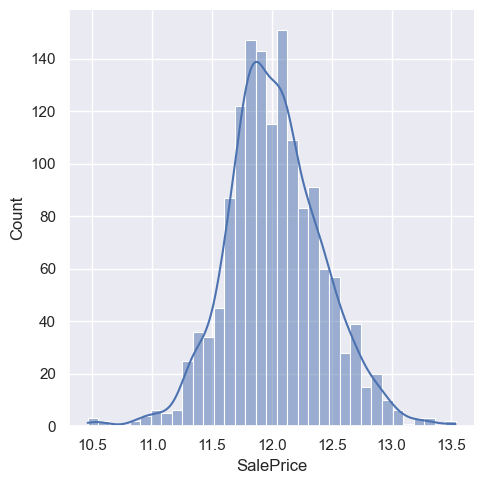

In [1807]:
# Checking skewness of 'SalePrice' again
sns.displot(data.SalePrice, kde = True)

SalePrice is now normally distributed

In [1808]:
# Convert three columns to 'object' type
data[['MSSubClass', 'OverallQual', 'OverallCond']] = data[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [1809]:
# Dividing the dataset in numeric and categorical variables
data_numer = data.select_dtypes(include = ['float64', 'int64'])
data_categ = data.select_dtypes(include = 'object')

In [1810]:
# Correlation matrix for numeric variable
correlation = data_numer.corr()
correlation

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.335957,0.120999,0.084550,0.196381,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.031873,0.385190,0.107226,0.006620,0.186561,0.054190,0.245232,-0.005627,0.332619,0.249295,0.062380,0.281393,0.339085,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.353288
LotArea,0.335957,1.000000,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
YearBuilt,0.120999,0.014228,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.084550,0.013788,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.196381,0.103960,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.247621,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.429531
BsmtFinSF1,0.232576,0.214103,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,0.052237,0.111170,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832
BsmtUnfSF,0.119174,-0.002618,0.149040,0.181133,0.114184,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.185610,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.221985
TotalBsmtSF,0.381038,0.260833,0.391452,0.291066,0.362452,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.309386,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.612134
1stFlrSF,0.434109,0.299475,0.281986,0.240379,0.342160,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.224897,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.596981


<Axes: >

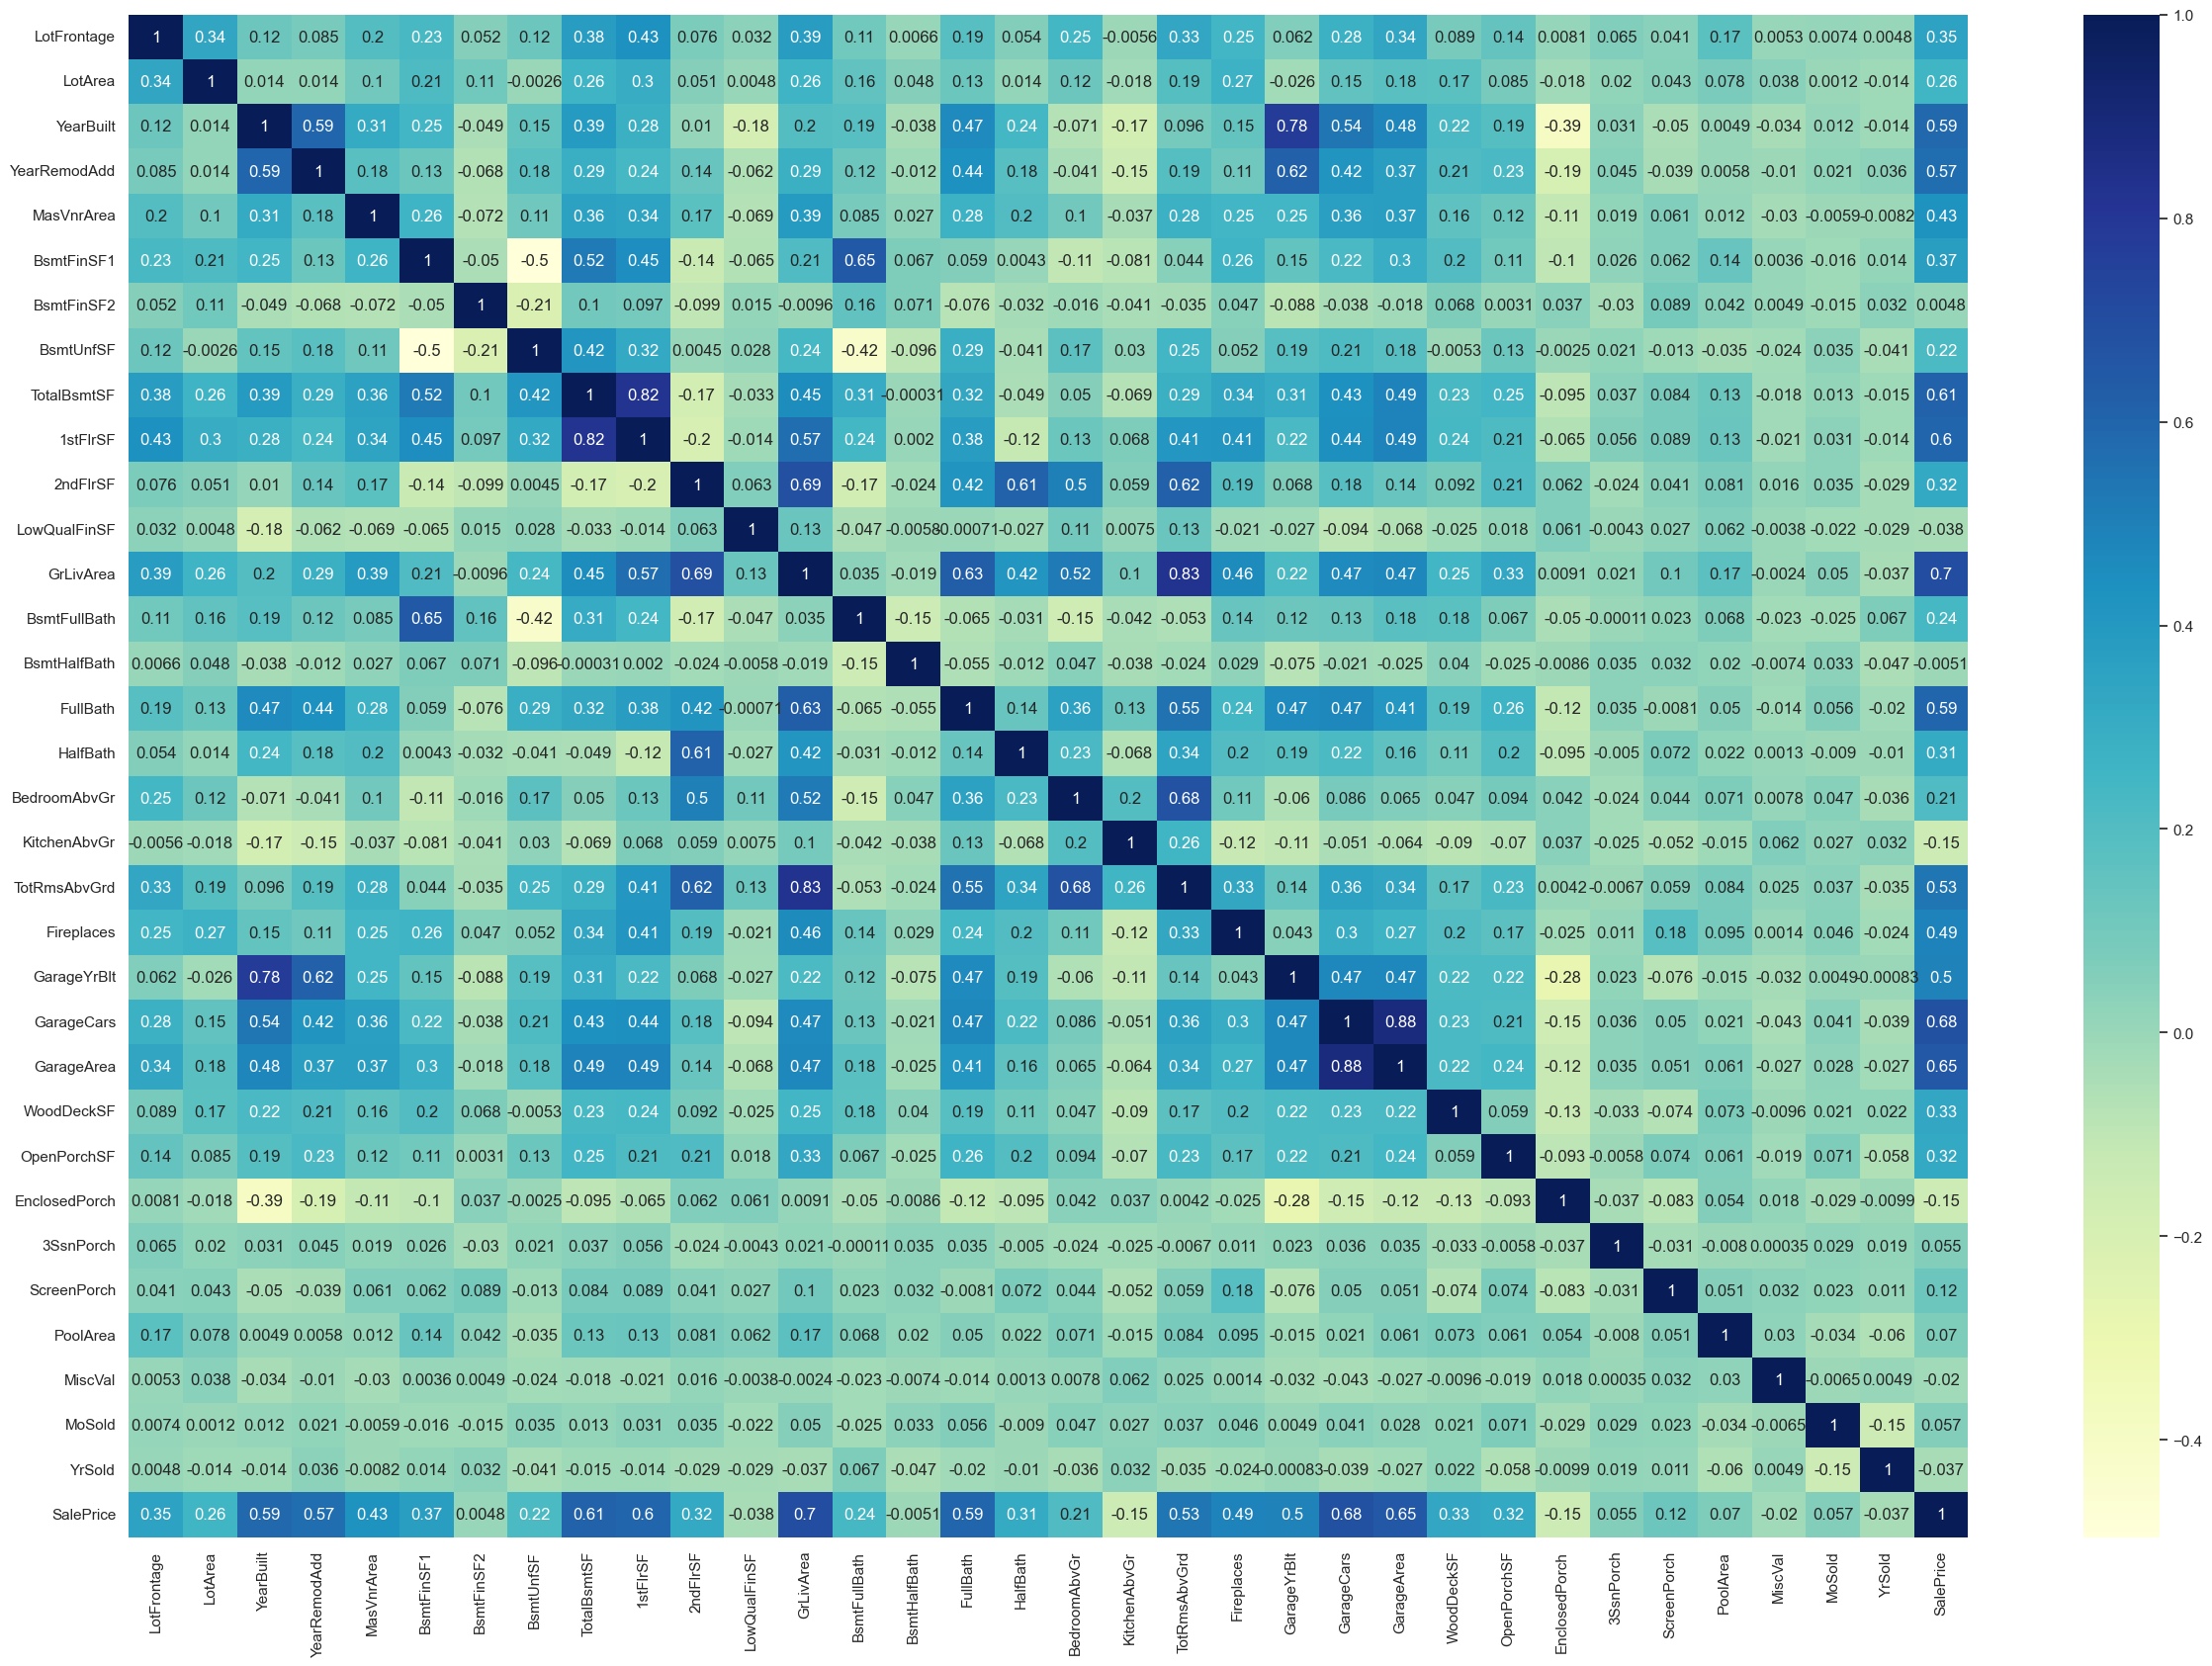

In [1811]:
# Plotting heatmap
plt.figure(figsize=(30,20))
sns.heatmap(correlation, cmap="YlGnBu", annot=True)

Some of the variables are highly correlated 'GrLivArea', 'GarageCars' and 'GarageArea' so we can use Ridge regression

In [1812]:
# Derive new column for property age (YrSold - YearBuilt )
data['Prop_age'] = data.YrSold - data.YearBuilt
data.shape

(1460, 81)

In [1813]:
# dropping the columns 'YrSold', 'YearBuilt', and 'MoSold' 
data.drop(['YrSold', 'YearBuilt', 'MoSold'], axis=1, inplace=True)
data.shape

(1460, 78)

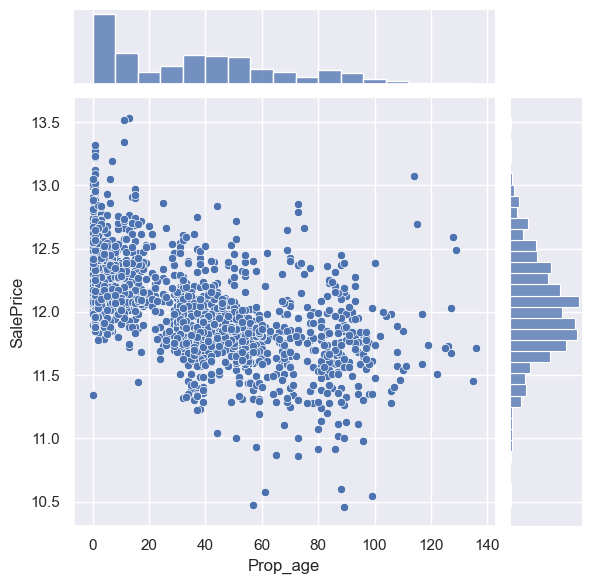

In [1814]:
# Prop_age vs SalePrice
sns.jointplot(x = data.Prop_age, y = data.SalePrice)

Increase in property age causes decrease in SalePrice

In [1815]:
# Again dividing the dataset into numeric and categorical variables
data_numer = data.select_dtypes(include = ['float64', 'int64'])
data_categ = data.select_dtypes(include = 'object')

In [1816]:
# Creating dummy variables (one hot encoding) for categorical variables
data_categ_enc = pd.get_dummies(data_categ, drop_first=True, dtype=int)
data_categ_enc.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1817]:
data_categ_enc.shape

(1460, 255)

<Axes: >

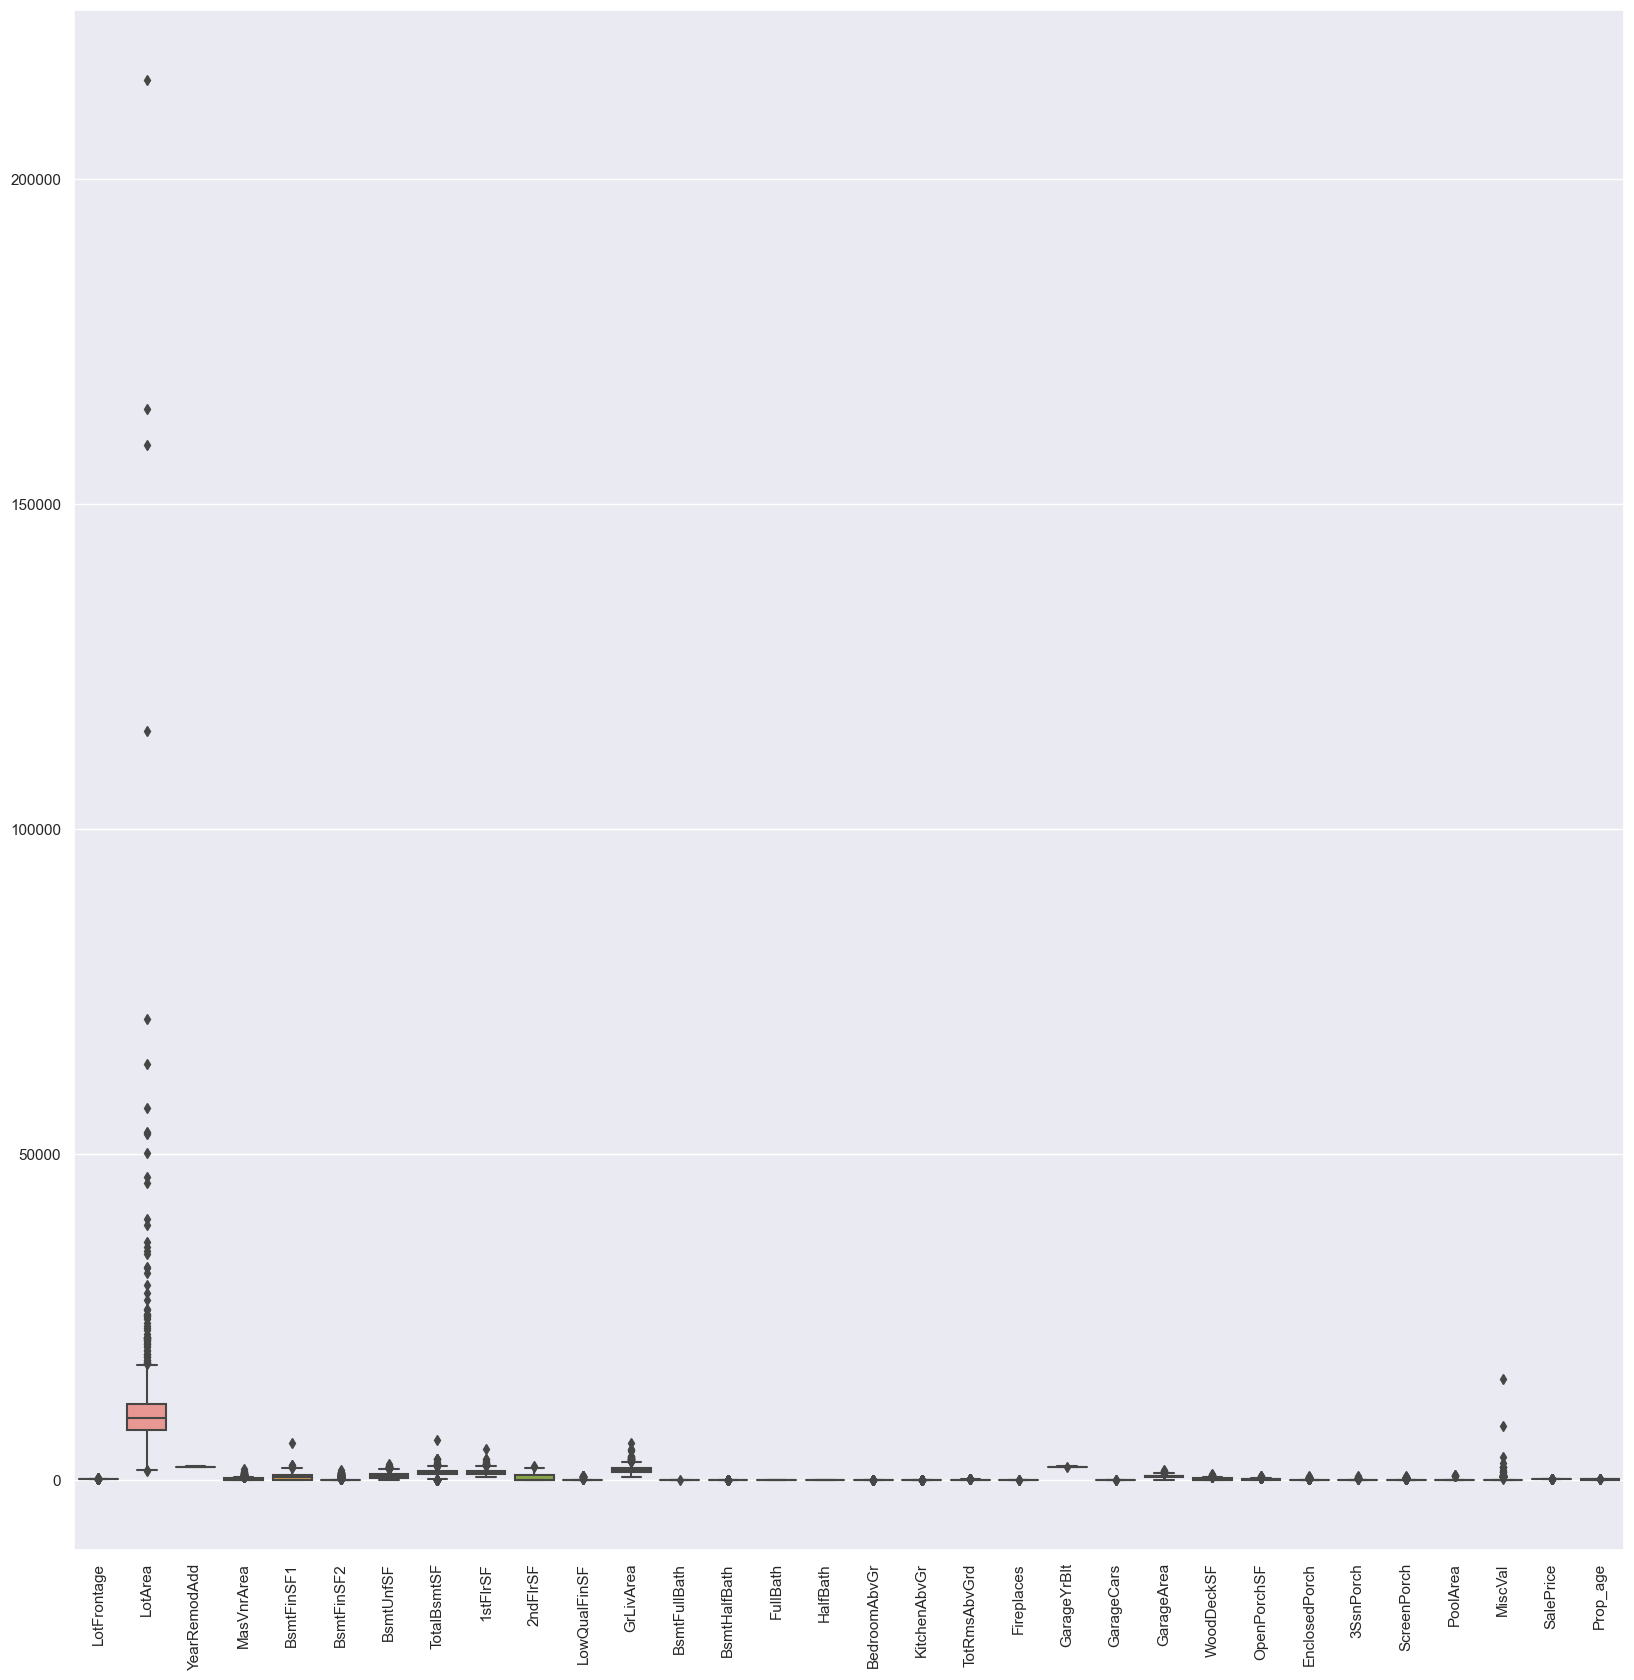

In [1818]:
# Plotting Box plot for numeric variables
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
sns.boxplot(data_numer)

In [1819]:
# Removing the outliers from numeric columns by capping the percentile to 5% and 95%
for i in data_numer.columns:
    data_numer[i][data_numer[i] <= data_numer[i].quantile(0.05)] = data_numer[i].quantile(0.05)
    data_numer[i][data_numer[i] >= data_numer[i].quantile(0.95)] = data_numer[i].quantile(0.95)

<Axes: >

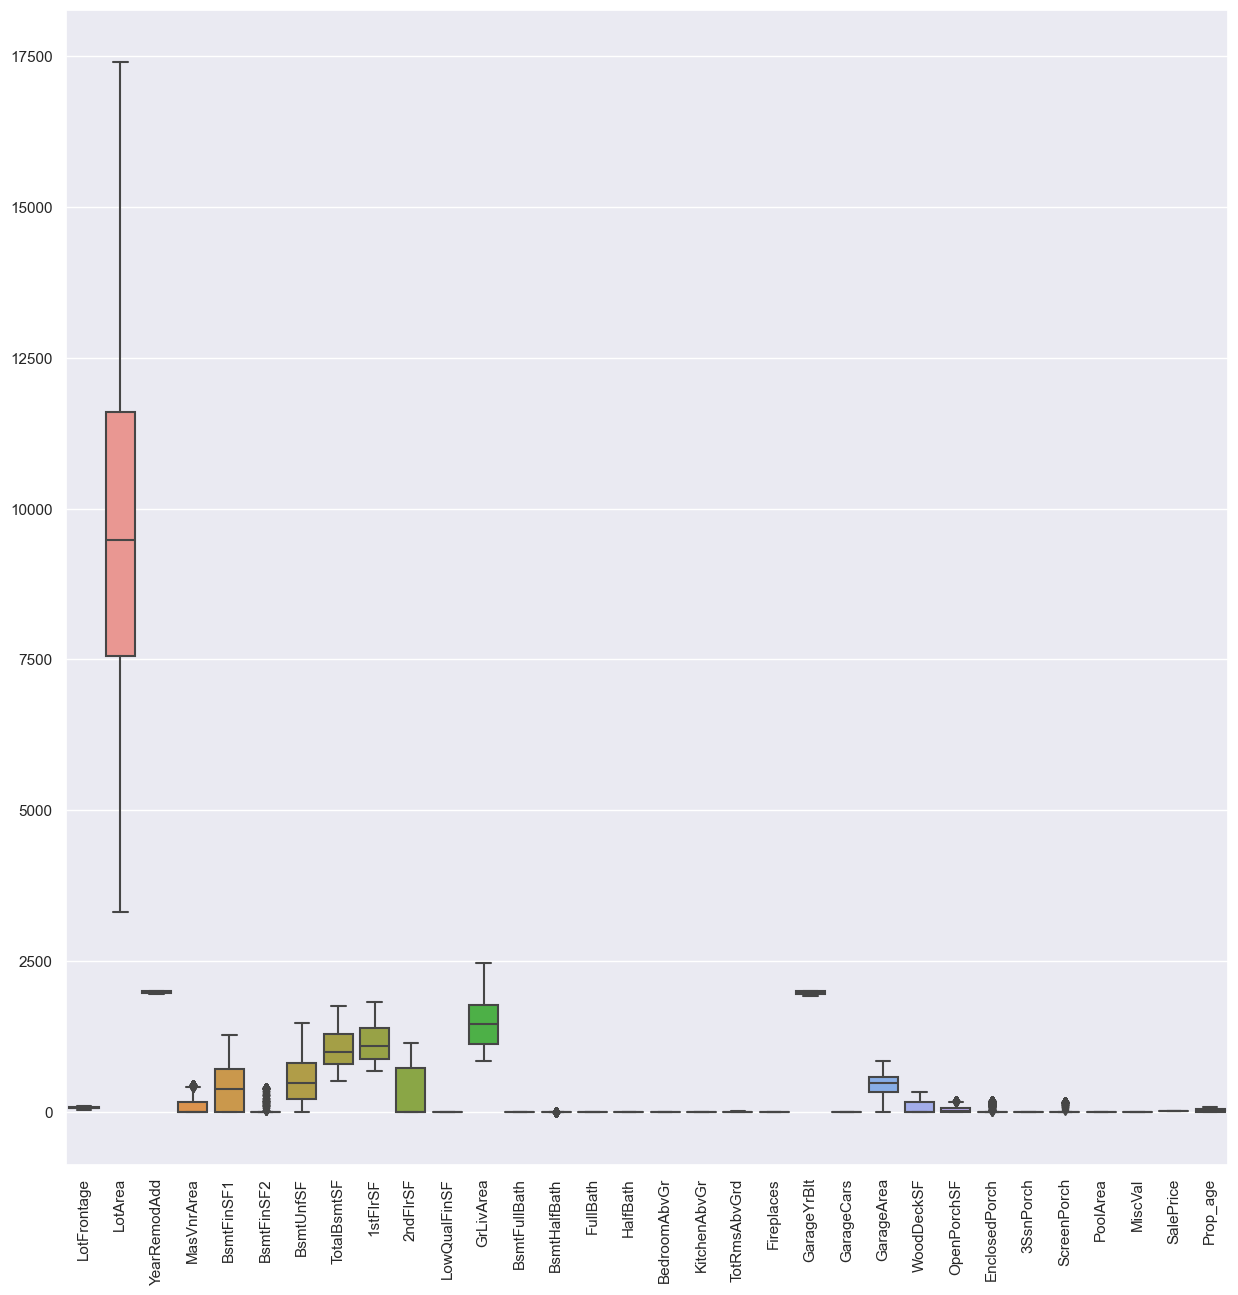

In [1820]:
# Plotting the Box plots again to check whether the outliers have been removed
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=data_numer)

Outliers are removed from numeric columns

In [1821]:
# Concatinating numeric & categorical columns
data = pd.concat([data_numer,data_categ_enc], axis=1)

In [1822]:
# Checking the dataset
data.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Prop_age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,196.0,706,0.0,150,856.0,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548.0,0,61.0,0.00,0,0,0,0,12.247694,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,1976.0,2,460.0,298,0.0,0.00,0,0,0,0,12.109011,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2002,162.0,486,0.0,434,920.0,920.0,866.0,0,1786.0,1,0,2,1,3,1,6,1,2001.0,2,608.0,0,42.0,0.00,0,0,0,0,12.317167,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1970,0.0,216,0.0,540,756.0,961.0,756.0,0,1717.0,1,0,1,0,3,1,7,1,1998.0,3,642.0,0,35.0,180.15,0,0,0,0,11.849398,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,9,1,2000.0,3,836.0,192,84.0,0.00,0,0,0,0,12.429216,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


  Modelling and Evaluation

In [1823]:
# Removing the target variable from X dataset
X = data.drop("SalePrice", axis=1)
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Prop_age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,196.0,706,0.0,150,856.0,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548.0,0,61.0,0.00,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,0.0,978,0.0,284,1262.0,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,1976.0,2,460.0,298,0.0,0.00,0,0,0,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2002,162.0,486,0.0,434,920.0,920.0,866.0,0,1786.0,1,0,2,1,3,1,6,1,2001.0,2,608.0,0,42.0,0.00,0,0,0,0,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1970,0.0,216,0.0,540,756.0,961.0,756.0,0,1717.0,1,0,1,0,3,1,7,1,1998.0,3,642.0,0,35.0,180.15,0,0,0,0,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,350.0,655,0.0,490,1145.0,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,9,1,2000.0,3,836.0,192,84.0,0.00,0,0,0,0,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [1824]:
# Adding target variable to y dataset
y = data.SalePrice
y.head() 

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [1825]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=50)

In [1826]:
# Checking the shape of train and test data set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1021, 286)
(1021,)
(438, 286)
(438,)


In [1827]:
# Creating list of numeric variables
num_col = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_col

['LotFrontage',
 'LotArea',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'Prop_age']

In [1828]:
# Scaling the numeric variables
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.fit_transform(X_test[num_col])

   Model 1 - Ridge Regression

In [1829]:
# Alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1830]:
# Checking the best value for alpha
ridge_cv.best_params_

{'alpha': 9.0}

In [1831]:
# Create a ridge regression instance with optimum value alpha=20
ridge = Ridge(alpha=9)

In [1832]:
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=9)

In [1833]:
# View the coefficients of ridge regression fitted model
ridge.coef_

array([ 8.55211786e-03,  1.53367167e-02,  3.37555375e-02, -2.27884992e-03,
        1.11932198e-02,  1.68158254e-03, -1.26097738e-02,  5.09085264e-02,
        1.32531007e-02,  3.16184962e-02,  0.00000000e+00,  7.77114205e-02,
        9.28950120e-03, -1.40030564e-03,  1.53008263e-02,  1.48030388e-02,
        5.38923715e-03,  0.00000000e+00, -1.57527515e-03,  8.11848755e-03,
       -1.19512085e-02,  1.77375385e-02,  2.36480690e-02,  1.08652896e-02,
        6.60012792e-03,  4.41177347e-03,  0.00000000e+00,  8.17219362e-03,
        0.00000000e+00,  0.00000000e+00, -4.68035935e-02, -1.52298023e-02,
       -7.83574952e-03, -5.58264541e-03,  1.06285881e-02,  2.67170586e-04,
        4.20216491e-02, -2.96183619e-04, -3.34210186e-03,  7.16903440e-03,
       -2.68503973e-02,  4.48898809e-03, -4.64115171e-02, -1.87225809e-02,
       -1.28253885e-02,  3.32564527e-02,  2.94211035e-02,  1.10428593e-02,
       -3.93532971e-02, -9.84193468e-04,  1.29366686e-02, -8.28052911e-03,
        8.14739399e-03, -

In [1834]:
# Predicting
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [1835]:
# Calculating and printing r2 score for train and test set
Ridge_r2_score_train = r2_score(y_train, y_train_pred)
Ridge_r2_score_test = r2_score(y_test, y_pred)
print("Ridge r2 score train = " + str(Ridge_r2_score_train))
print("Ridge r2 score test = " + str(Ridge_r2_score_test))

Ridge r2 score train = 0.9397860268362681
Ridge r2 score test = 0.9129308566149134


The r2 score for train and test are close

In [1836]:
# Calculating and printing RMSE
Ridge_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
Ridge_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Ridge RMSE train = ", Ridge_RMSE_Train)
print("Ridge RMSE test = ", Ridge_RMSE_Test)

Ridge RMSE train =  0.08643901877197495
Ridge RMSE test =  0.10428352017090076


   Model 2 - Lasso Regression

In [1837]:
# Alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


lasso = Lasso()

# cross validation
folds = 5
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1838]:
# Checking the best value for alpha
lasso_cv.best_params_

{'alpha': 0.001}

In [1839]:
# Create a lasso regression instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [1840]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [1841]:
# View the coefficients of lasso regression fitted model
lasso.coef_

array([ 0.00738159,  0.01490246,  0.03997539, -0.        ,  0.0281211 ,
        0.0016737 , -0.        ,  0.05175793,  0.        ,  0.01792405,
        0.        ,  0.09841609,  0.00940143, -0.        ,  0.00795022,
        0.01058233, -0.        ,  0.        , -0.        ,  0.01394288,
       -0.        ,  0.02073539,  0.02048515,  0.0110951 ,  0.00622143,
        0.00285183,  0.        ,  0.00957665,  0.        ,  0.        ,
       -0.04856296, -0.        , -0.        ,  0.        ,  0.00574627,
       -0.        ,  0.01726972, -0.        ,  0.        ,  0.        ,
       -0.0330549 ,  0.        , -0.01868021, -0.        , -0.        ,
        0.00177594,  0.        , -0.        , -0.05547106, -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.00298385,
        0.        ,  0.        , -0.00478801, -0.        ,  0.01640811,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.0390508 ,  0.        , -0.  

In [1842]:
# Predicting
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [1843]:
# Calculating and printing r2 score for train and test set
Lasso_r2_score_train = r2_score(y_train, y_train_pred)
Lasso_r2_score_test = r2_score(y_test, y_pred)
print("Lasso r2 score train = " + str(Lasso_r2_score_train))
print("Lasso r2 score test = " + str(Lasso_r2_score_test))

Lasso r2 score train = 0.9231711968248919
Lasso r2 score test = 0.9102282726885693


The r2 score for train and test are close

In [1844]:
# Calculating and printing RMSE
Lasso_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
Lasso_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Lasso RMSE train = ", Lasso_RMSE_Train)
print("Lasso RMSE test = ", Lasso_RMSE_Test)

Lasso RMSE train =  0.09763897685769793
Lasso RMSE test =  0.1058896072800575


Comparing Ridge and Lasso Regression

In [1845]:
Ridge_Lasso = pd.DataFrame(index=['R2 Score (Train)', 'R2 Score (Test)', 'RMSE (Train)', 'RMSE (Test)'], 
                     columns = ['Ridge Regression', 'Lasso Regression'])
Ridge_Lasso['Ridge Regression'] = Ridge_r2_score_train, Ridge_r2_score_test, Ridge_RMSE_Train, Ridge_RMSE_Test
Ridge_Lasso['Lasso Regression'] = Lasso_r2_score_train, Lasso_r2_score_test, Lasso_RMSE_Train, Lasso_RMSE_Test
Ridge_Lasso

,Ridge Regression,Lasso Regression
R2 Score (Train),0.939786,0.923171
R2 Score (Test),0.912931,0.910228
RMSE (Train),0.086439,0.097639
RMSE (Test),0.104284,0.105890


The r2 score in test data is almost same in Ridge and Lasso Regression

In [1846]:
# Checking the coefficients of Ridge and Lasso

# Creating an empty dataframe for all the independent variables
data_new = pd.DataFrame(index=X.columns)
data_new.rows = X.columns

# Filling the dataframe with Ridge and Lasso coefficients
data_new['Ridge'] = ridge.coef_
data_new['Lasso'] = lasso.coef_
data_new

,Ridge,Lasso
LotFrontage,0.008552,0.007382
LotArea,0.015337,0.014902
YearRemodAdd,0.033756,0.039975
MasVnrArea,-0.002279,-0.000000
BsmtFinSF1,0.011193,0.028121
...,...,...
SaleCondition_AdjLand,0.029469,0.000000
SaleCondition_Alloca,0.037979,0.000000
SaleCondition_Family,-0.006882,-0.000000
SaleCondition_Normal,0.051912,0.039887


In [1847]:
# Count of features removed by Lasso
data_new[(data_new['Lasso'] == 0)].shape

(203, 2)

In [1848]:
# Count of features selected by Lasso
data_new[(data_new['Lasso'] != 0)].shape

(83, 2)

In [1849]:
# Features selected by Lasso
data_new.loc[data_new['Lasso'] != 0, 'Lasso']

LotFrontage             0.007382
LotArea                 0.014902
YearRemodAdd            0.039975
BsmtFinSF1              0.028121
BsmtFinSF2              0.001674
TotalBsmtSF             0.051758
2ndFlrSF                0.017924
GrLivArea               0.098416
BsmtFullBath            0.009401
FullBath                0.007950
HalfBath                0.010582
Fireplaces              0.013943
GarageCars              0.020735
GarageArea              0.020485
WoodDeckSF              0.011095
OpenPorchSF             0.006221
EnclosedPorch           0.002852
ScreenPorch             0.009577
Prop_age               -0.048563
MSSubClass_50           0.005746
MSSubClass_70           0.017270
MSSubClass_90          -0.033055
MSSubClass_160         -0.018680
MSZoning_FV             0.001776
MSZoning_RM            -0.055471
LotShape_Reg           -0.002984
LandContour_Lvl        -0.004788
LotConfig_CulDSac       0.016408
Neighborhood_BrkSide    0.039051
Neighborhood_Crawfor    0.097818
Neighborho

Identifying the top 10 features for Ridge and Lasso Regression

In [1850]:
# We have taken log of target variable so to interpret the Ridge coefficients we have to take inverse of log
ridge_coeff = np.exp(data_new.Ridge)
ridge_coeff.sort_values(ascending=False)[:10]

Neighborhood_Crawfor    1.085383
GrLivArea               1.080811
OverallCond_9           1.078759
OverallQual_9           1.076185
OverallQual_8           1.073101
Functional_Typ          1.068117
Exterior1st_BrkFace     1.058722
SaleCondition_Normal    1.053283
TotalBsmtSF             1.052227
CentralAir_Y            1.051804
Name: Ridge, dtype: float64

In [1851]:
# We have taken log of target variable so to interpret the Lasso coefficients we have to take inverse of log
lasso_coeff = np.exp(data_new.Lasso)
lasso_coeff.sort_values(ascending=False)[:10]

OverallQual_9           1.117314
GrLivArea               1.103422
Neighborhood_Crawfor    1.102762
OverallQual_8           1.099060
Functional_Typ          1.074843
Exterior1st_BrkFace     1.058809
TotalBsmtSF             1.053121
OverallQual_7           1.043399
YearRemodAdd            1.040785
SaleCondition_Normal    1.040693
Name: Lasso, dtype: float64

As per Lasso Regression the variables which are significant in predicting the price of the house are below:

- OverallQual_9
- GrLivArea
- Neighborhood_Crawfor
- OverallQual_8
- Functional_Typ
- Exterior1st_BrkFace 
- TotalBsmtSF         
- OverallQual_7       
- YearRemodAdd        
- SaleCondition_Normal

As per Lasso regression

- If the overall quality of house is excellent then the price will increase 1.11 times
- If the living area above ground increases by 1 square foot then the price increases 1.10 times
- If the neighbourhood is Crawfor then price increases 1.10 times
- If the overall quality of house is very good then the price will increase 1.09 times
- If the Home Functionality is Typ then price increases 1.07 times
- If the exterior covering on house is Brick face then price increases 1.05 times
- If the Total square feet of basement area increases then price increases 1.05 times

Optimal value of lambda for ridge and lasso regression are:
- Ridge Regression Lambda = 9
- Lasso Regression = 0.001

In [1852]:
# Create a Ridge regression model with double value of alpha (18)
ridge = Ridge(alpha=18)

# Fit the model on training data
ridge.fit(X_train, y_train)

# Predicting
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

# Calculating and printing r2 score for train and test set
Ridge_r2_score_train = r2_score(y_train, y_train_pred)
Ridge_r2_score_test = r2_score(y_test, y_pred)
print("Ridge r2 score train = " + str(Ridge_r2_score_train))
print("Ridge r2 score test = " + str(Ridge_r2_score_test))

# Calculating and printing RMSE
Ridge_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
Ridge_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Ridge RMSE train = ", Ridge_RMSE_Train)
print("Ridge RMSE test = ", Ridge_RMSE_Test)

Ridge r2 score train = 0.9342218185779881
Ridge r2 score test = 0.9119076366230291
Ridge RMSE train =  0.0903445828779603
Ridge RMSE test =  0.1048944904469944


In [1853]:
# Create a Lasso regression model with double value of alpha (0.002)
lasso = Lasso(alpha=0.002)

# Fit the model on training data
lasso.fit(X_train, y_train)

# Predicting
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

# Calculating and printing r2 score for train and test set
Lasso_r2_score_train = r2_score(y_train, y_train_pred)
Lasso_r2_score_test = r2_score(y_test, y_pred)
print("Lasso r2 score train = " + str(Lasso_r2_score_train))
print("Lasso r2 score test = " + str(Lasso_r2_score_test))

# Calculating and printing RMSE
Lasso_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
Lasso_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Lasso RMSE train = ", Lasso_RMSE_Train)
print("Lasso RMSE test = ", Lasso_RMSE_Test)

Lasso r2 score train = 0.9077769349512804
Lasso r2 score test = 0.8940076632456179
Lasso RMSE train =  0.10697467159804243
Lasso RMSE test =  0.11505904903971662


In [1854]:
# Comparing Ridge and Lasso
Ridge_Lasso = pd.DataFrame(index=['R2 Score (Train)', 'R2 Score (Test)', 'RMSE (Train)', 'RMSE (Test)'], 
                     columns = ['Ridge Regression', 'Lasso Regression'])
Ridge_Lasso['Ridge Regression'] = Ridge_r2_score_train, Ridge_r2_score_test, Ridge_RMSE_Train, Ridge_RMSE_Test
Ridge_Lasso['Lasso Regression'] = Lasso_r2_score_train, Lasso_r2_score_test, Lasso_RMSE_Train, Lasso_RMSE_Test
Ridge_Lasso 

,Ridge Regression,Lasso Regression
R2 Score (Train),0.934222,0.907777
R2 Score (Test),0.911908,0.894008
RMSE (Train),0.090345,0.106975
RMSE (Test),0.104894,0.115059


After doubling the value of alpha below are the changes in R2 score

- Ridge Regression R2 score for training set decreased from 0.939 to 0.934
- Ridge Regression R2 score for test set decreased from 0.912 to 0.911
- Lasso Regression R2 score for training set decreased from 0.92 to 0.90
- Lasso Regression R2 score for test set decreased from 0.91 to 0.89

In [1855]:
# Checking the coefficients of Ridge and Lasso

# Creating an empty dataframe for all the independent variables
data_new = pd.DataFrame(index=X.columns)
data_new.rows = X.columns

# Filling the dataframe with Ridge and Lasso coefficients
data_new['Ridge'] = ridge.coef_
data_new['Lasso'] = lasso.coef_
data_new

,Ridge,Lasso
LotFrontage,0.009313,0.007771
LotArea,0.015274,0.015701
YearRemodAdd,0.036871,0.048651
MasVnrArea,-0.000744,-0.000000
BsmtFinSF1,0.017503,0.029197
...,...,...
SaleCondition_AdjLand,0.016116,0.000000
SaleCondition_Alloca,0.020897,0.000000
SaleCondition_Family,-0.008209,-0.000000
SaleCondition_Normal,0.046009,0.020644


In [1856]:
# We have taken log of target variable so to interpret the Ridge coefficients we have to take inverse of log
ridge_coeff = np.exp(data_new.Ridge)
ridge_coeff.sort_values(ascending=False)[:10]

GrLivArea               1.075393
Neighborhood_Crawfor    1.070584
OverallQual_8           1.063942
Functional_Typ          1.060890
OverallQual_9           1.059654
OverallCond_9           1.054423
Exterior1st_BrkFace     1.049176
TotalBsmtSF             1.048748
SaleCondition_Normal    1.047084
OverallCond_7           1.046273
Name: Ridge, dtype: float64

In [1857]:
# We have taken log of target variable so to interpret the Lasso coefficients we have to take inverse of log
lasso_coeff = np.exp(data_new.Lasso)
lasso_coeff.sort_values(ascending=False)[:10]

GrLivArea               1.108412
Neighborhood_Crawfor    1.073299
OverallQual_8           1.073075
Functional_Typ          1.069561
OverallQual_9           1.060563
TotalBsmtSF             1.055341
YearRemodAdd            1.049854
FireplaceQu_Gd          1.030426
OverallCond_7           1.030195
BsmtFinSF1              1.029627
Name: Lasso, dtype: float64

Dropping 5 most important predictor variables from Lasso Model and building the model again

In [1858]:
# Creating list of 5 most important predictor variables from Lasso Model
top_5_impvar = ['OverallQual_9','GrLivArea','Neighborhood_Crawfor','OverallQual_8','Functional_Typ']

# Dropping these variables from X_train and X_test set
X_train = X_train.drop(top_5_impvar, axis=1)
X_test = X_test.drop(top_5_impvar, axis=1)

In [1859]:
# Alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


lasso = Lasso()

# cross validation
folds = 5
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1860]:
# Checking the best value for alpha
lasso_cv.best_params_

{'alpha': 0.0001}

In [1861]:
# Create a Lasso regression model with value of alpha (0.0001)
lasso = Lasso(alpha=0.0001)

# Fit the model on training data
lasso.fit(X_train, y_train)

# Predicting
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

# Calculating and printing r2 score for train and test set
Lasso_r2_score_train = r2_score(y_train, y_train_pred)
Lasso_r2_score_test = r2_score(y_test, y_pred)
print("Lasso r2 score train = " + str(Lasso_r2_score_train))
print("Lasso r2 score test = " + str(Lasso_r2_score_test))

# Calculating and printing RMSE
Lasso_RMSE_Train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
Lasso_RMSE_Test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Lasso RMSE train = ", Lasso_RMSE_Train)
print("Lasso RMSE test = ", Lasso_RMSE_Test)

Lasso r2 score train = 0.9465492166145639
Lasso r2 score test = 0.8677192046117794
Lasso RMSE train =  0.08144008593909781
Lasso RMSE test =  0.12853812059059985


In [1862]:
# Checking the coefficients of Lasso

# Creating an empty dataframe for all the independent variables
data_new = pd.DataFrame(index=X_train.columns)
data_new.rows = X_train.columns

# Filling the dataframe with Lasso coefficients
data_new['Lasso'] = lasso.coef_
data_new

,Lasso
LotFrontage,0.009098
LotArea,0.017390
YearRemodAdd,0.026863
MasVnrArea,0.001647
BsmtFinSF1,0.007231
...,...
SaleCondition_AdjLand,0.100485
SaleCondition_Alloca,0.109917
SaleCondition_Family,0.000000
SaleCondition_Normal,0.063726


In [1863]:
# We have taken log of target variable so to interpret the Lasso coefficients we have to take inverse of log
lasso_coeff = np.exp(data_new.Lasso)
lasso_coeff.sort_values(ascending=False)[:5]

Condition2_PosA          1.256594
OverallCond_9            1.168136
SaleType_Oth             1.125862
SaleCondition_Alloca     1.116186
SaleCondition_AdjLand    1.105707
Name: Lasso, dtype: float64